<a href="https://colab.research.google.com/github/YagyanshB/ml-models-understanding/blob/main/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset within our ide

df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Med_1_mL', ylabel='Med_1_mL'>

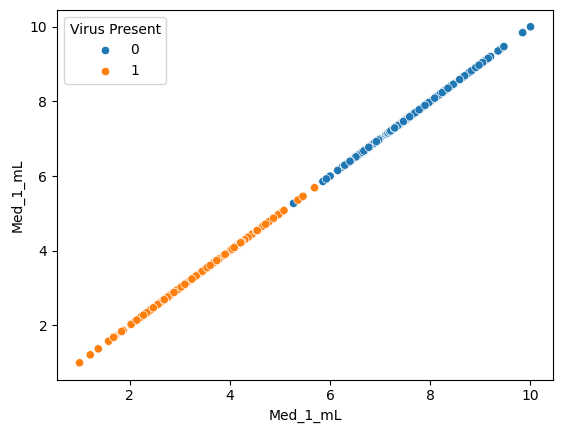

In [8]:
sns.scatterplot( x = 'Med_1_mL', y = 'Med_1_mL', hue = 'Virus Present', data = df)

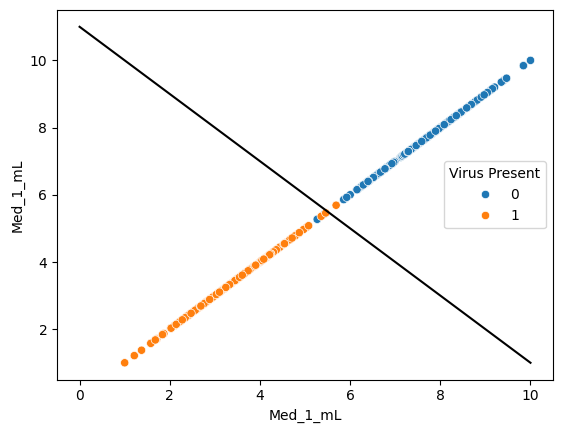

In [10]:
# creating a hyperplane
sns.scatterplot( x = 'Med_1_mL', y = 'Med_1_mL', hue = 'Virus Present', data = df)

x = np.linspace(0,10,100)
m = -1
b = 11

y = m*x + b
plt.plot(x,y,'black')

In [11]:
from sklearn.svm import SVC

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [13]:
y = df['Virus Present']
X = df.drop('Virus Present', axis = 1)

In [19]:
model = SVC(kernel = 'rbf', C = 1000)

In [20]:
model.fit(X,y)

SVC(C=1000)

In [21]:
from svm_margin_plot import plot_svm_boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


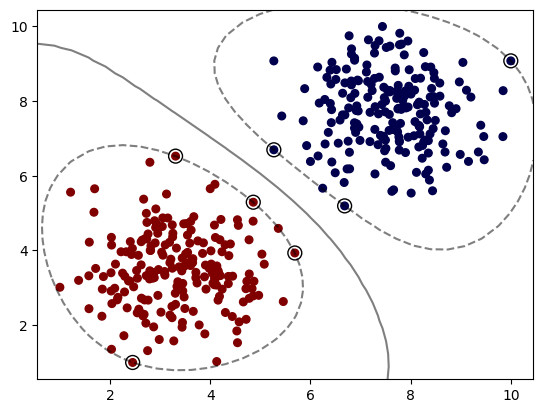

In [22]:
plot_svm_boundary(model,X,y)

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# We'll try different values for C (regularization) and gamma (kernel coefficient)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'] # We'll stick to the rbf kernel for this example
}

# Create an SVC model instance
svm_model = SVC()

# Redefine X and y to use the classification dataset (mouse_viral_study.csv)
y_classification = df['Virus Present']
X_classification = df.drop('Virus Present', axis = 1)

# Instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
# verbose=3 provides more output during the search process
# refit=True (default) means it will refit the best estimator on the entire dataset
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=3, scoring='accuracy')

# Fit the GridSearchCV to our data
print("Starting GridSearchCV...")
grid_search.fit(X_classification, y_classification)
print("GridSearchCV completed.")

Starting GridSearchCV...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .......C=

ValueError: 
All the 125 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py", line 747, in _validate_targets
    check_classification_targets(y)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [68]:
# Print the best parameters found by the grid search
print("Best parameters found:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

# Get the best estimator (the model with the optimal parameters)
best_svm_model = grid_search.best_estimator_

# We can now use this best_svm_model for prediction or further analysis
# For example, let's plot the decision boundary with the best model
print("Plotting decision boundary with best model...")
plot_svm_boundary(best_svm_model, X_classification, y_classification)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [25]:
df1 = pd.read_csv('cement_slump.csv')

In [26]:
df1.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [27]:
df1.shape

(103, 10)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [29]:
df1.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


<Axes: >

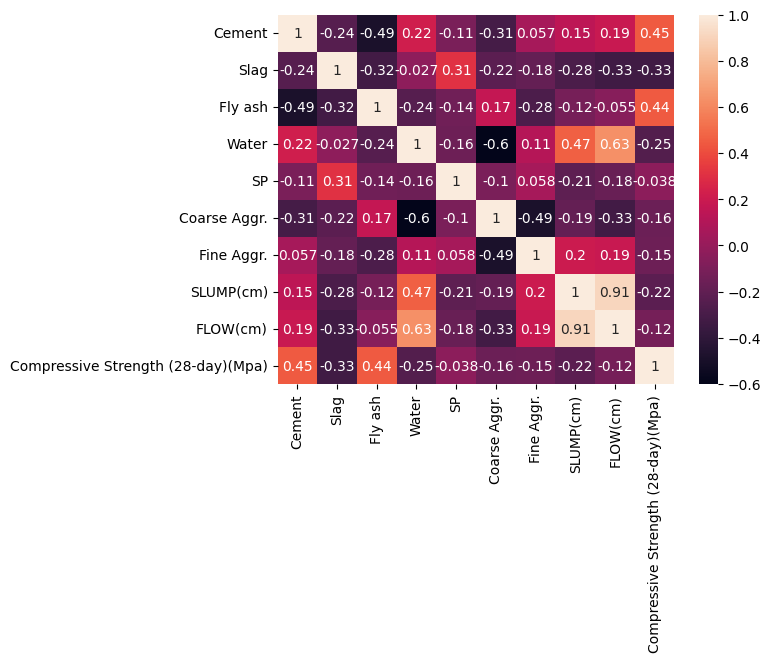

In [31]:
sns.heatmap(df1.corr(), annot = True)

In [35]:
X = df1.drop('Compressive Strength (28-day)(Mpa)', axis = 1)

In [36]:
y = df1['Compressive Strength (28-day)(Mpa)']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 101)

In [41]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [42]:
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [43]:
from sklearn.svm import SVR, LinearSVR

In [44]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |
 |  Epsilon-Support Vector Regression.
 |
 |  The free parameters in the model are C and epsilon.
 |
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or ca

In [46]:
df2 = pd.read_csv('wine_fraud.csv')

In [47]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [48]:
df2.shape

(6497, 13)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [50]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [52]:
df2.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [53]:
df2['quality'].nunique()

2

In [54]:
df2['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

/tmp/ipython-input-4258371539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df2['quality'], palette = 'rainbow')


<Axes: xlabel='quality', ylabel='count'>

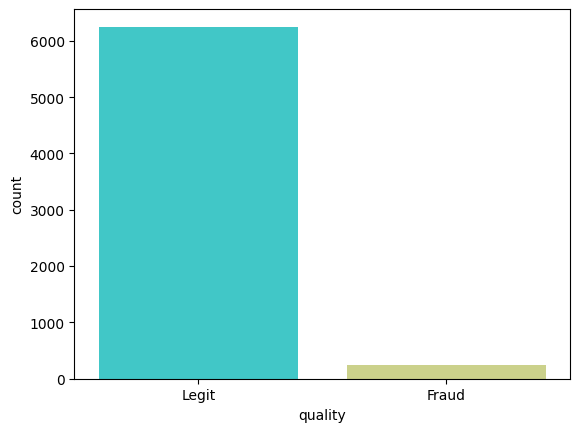

In [69]:
sns.countplot(x = df2['quality'], palette = 'rainbow')

In [60]:
df2['quality'].value_counts()

,count
quality,
Legit,6251
Fraud,246


<Axes: xlabel='Wine Quality', ylabel='Count'>

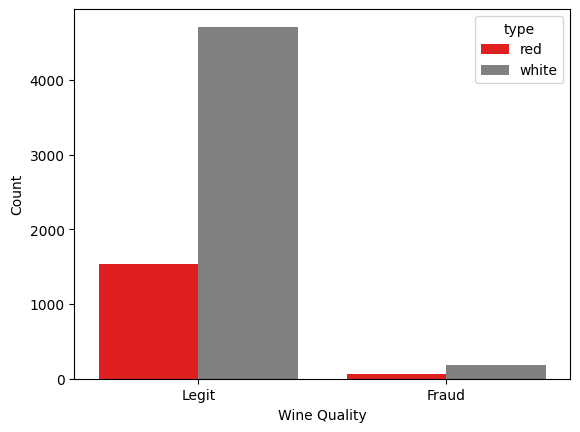

In [72]:
plt.xlabel('Wine Quality')
plt.ylabel('Count')
custom_palette = {'red': 'red', 'white': 'gray'}
sns.countplot(x = df2['quality'], hue = df2['type'], palette = custom_palette)

In [86]:
df2['quality'] = df2['quality'].map({'Legit': 0, 'Fraud': 1})

In [87]:
df2.select_dtypes(include=np.number).corr()['Fraud']

,Fraud
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


In [89]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red,0


In [90]:
df2['type'] = df2['type'].map({'white': 0, 'red': 1})

In [91]:
df2.corr()['Fraud']

,Fraud
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


In [92]:
df2 = df2.drop('Fraud', axis = 1)

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [95]:
X = df2.drop('quality', axis = 1)
y = df2['quality']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
Scaler = StandardScaler()

In [102]:
Scaled_X_train = Scaler.fit_transform(X_train)
Scaled_X_test = Scaler.transform(X_test)

In [103]:
from sklearn.svm import SVC

In [104]:
svc = SVC(class_weight = 'balanced')

In [105]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {'C' :[0.001, 0.01, 0.1, 0.5, 1]}

In [109]:
grid = GridSearchCV(svc, param_grid)

In [110]:
grid.fit(Scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [111]:
grid.best_params_

{'C': 1}

In [113]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [114]:
grid_preds = grid.predict(Scaled_X_test)

In [115]:
confusion_matrix(y_test, grid_preds)

array([[1058,  193],
       [  15,   34]])

In [119]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1251
           1       0.15      0.69      0.25        49

    accuracy                           0.84      1300
   macro avg       0.57      0.77      0.58      1300
weighted avg       0.95      0.84      0.89      1300

